<a href="https://colab.research.google.com/github/inoueshinji8/PythonStudy/blob/main/yolact_test1_fail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

まず何はともあれランタイムをGPUに直す。このファイルのタイトルはfailってあるけどそれをやるために時間置いてからやり直そう

In [ ]:
#得意のnvidia-smi。これでCUDA Version: 11.2が大事だな(下で間違ってるけどｗ)
!nvidia-smi

上の結果を見て、

https://zenn.dev/zzz/articles/970e5df5cf1f65
によると<br>
HP(https://pytorch.org/)<br>
から、OSやCudaのバージョンを適切に選択し、表示されるpipコマンドをコピペします。<br>
PyTorch Build : Stable (1.10.1)<br>
Your OS : Linux<br>
Package : Pip<br>
Language : Python<br>
Compute Platform : CUDA 11.3(11.2なんだが、これしか無いからこれにした)<br>

で、<br>
pip3 install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio==0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html<br>
って出るけど、これはLinuxではないので<br>
pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio==0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html<br>
とした。でもcu112だったらどうなるのか？<br>
今度は<br>
pip install torch==1.10.1+cu113 torchvision==0.11.2+cu112 torchaudio==0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
で試したい<br>

でも、これって毎回cudaのバージョンが違うらしいんだよな<br>
今度は11.2かも知れないってことだ<br>

In [1]:
!pip install cython
!pip install opencv-python pillow pycocotools matplotlib
#!pip install torchvision==0.5.0
#!pip install torch==1.4.0

#上の2行でなく
#!pip install -U torch==1.4 torchvision==0.5 -f https://download.pytorch.org/whl/cu101/torch_stable.html
#などと、nvidia-smiの結果を見てちゃんと作れ！って言うんだよな

     |████████████████████████████████| 4.0 MB 5.5 MB/s 
     |████████████████████████████████| 753.4 MB 6.5 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.4.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.4.0 which is incompatible.


In [1]:
%cd /content
!git clone https://github.com/dbolya/yolact.git

/content
Cloning into 'yolact'...
remote: Enumerating objects: 2936, done.
remote: Total 2936 (delta 0), reused 0 (delta 0), pack-reused 2936
Receiving objects: 100% (2936/2936), 21.20 MiB | 24.56 MiB/s, done.
Resolving deltas: 100% (2002/2002), done.


In [2]:
%cd /content/yolact/external/DCNv2
!python setup.py build develop

/content/yolact/external/DCNv2
running build
running build_ext
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:381: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
building '_ext' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/content
creating build/temp.linux-x86_64-3.7/content/yolact
creating build/temp.linux-x86_64-3.7/content/yolact/external
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src/cpu
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src/cuda
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-dIfp

In [3]:
%cd /content
!git clone https://github.com/chentinghao/download_google_drive.git

!mkdir -p '/content/yolact/weights'
weights = '/content/yolact/weights/yolact_plus_resnet50_54_800000.pth'

%cd download_google_drive
!python download_gdrive.py 1ZPu1YR2UzGHQD0o1rEqy-j5bmEm3lbyP '$weights'

/content
Cloning into 'download_google_drive'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.
/content/download_google_drive
32.0kB [00:00, 79.4MB/s]


In [4]:
inimgdir = '/content/yolact/in_img_files/'

!echo '$inimgdir'
!rm -r '$inimgdir'
!mkdir -p '$inimgdir'

%cd /content/download_google_drive
!python download_gdrive.py 19pvKhehjKsszhLAMLjujFQpsSswYOs2U '$inimgdir/pic1.jpg'
!python download_gdrive.py 13c8VOHdIxPzZSmenpxT31z3lnZemsPSo '$inimgdir/pic2.jpg'

/content/yolact/in_img_files/
rm: cannot remove '/content/yolact/in_img_files/': No such file or directory
/content/download_google_drive
160kB [00:00, 88.9MB/s]
160kB [00:00, 94.1MB/s]


/content/yolact/in_img_files/pic1.jpg


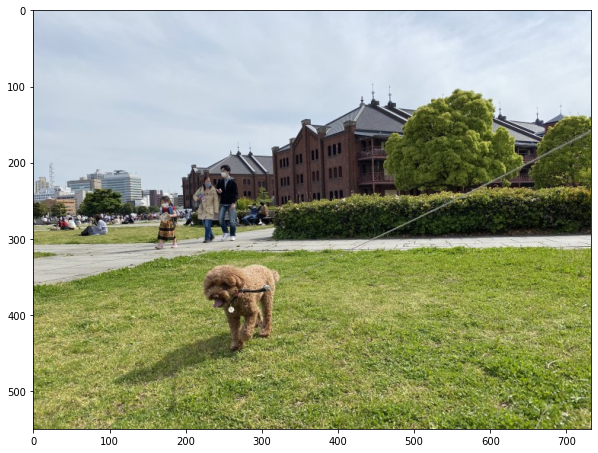

/content/yolact/in_img_files/pic2.jpg


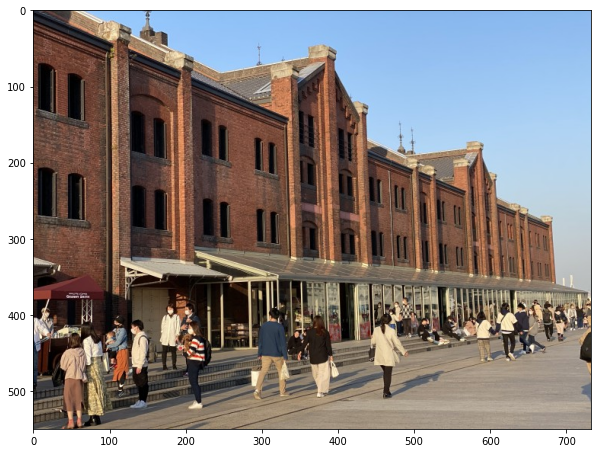

In [5]:
import os
import re
import matplotlib.pyplot as plt
import cv2

patternStr = '.+\.(jpg|png)'
pattern = re.compile(patternStr)
for item in os.listdir(inimgdir):
    result = pattern.match(item)
    if result:
        file = os.path.join(inimgdir,item)
        print(file)
        img = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.show()

In [6]:
outimgdir = '/content/yolact/out_img_files/'

!echo '$outimgdir' 
!rm -r '$outimgdir'
!mkdir -p '$outimgdir'

/content/yolact/out_img_files/
rm: cannot remove '/content/yolact/out_img_files/': No such file or directory


In [7]:
%cd /content/yolact
!echo '$weights'
!echo '$inimgdir'
!echo '$outimgdir'

!python eval.py --trained_model='$weights'\
                --config=yolact_plus_resnet50_config\
                --score_threshold=0.15\
                --top_k=15\
                --images='$inimgdir':'$outimgdir'

/content/yolact
/content/yolact/weights/yolact_plus_resnet50_54_800000.pth
/content/yolact/in_img_files/
/content/yolact/out_img_files/
Loading model...Traceback (most recent call last):
  File "eval.py", line 1097, in <module>
    net = Yolact()
  File "/content/yolact/yolact.py", line 402, in __init__
    self.backbone = construct_backbone(cfg.backbone)
  File "/content/yolact/backbone.py", line 451, in construct_backbone
    backbone = cfg.type(*cfg.args)
  File "/content/yolact/backbone.py", line 83, in __init__
    self._make_layer(block, 128, layers[1], stride=2, dcn_layers=dcn_layers[1], dcn_interval=dcn_interval)
  File "/content/yolact/backbone.py", line 114, in _make_layer
    layers.append(block(self.inplanes, planes, stride, downsample, self.norm_layer, self.dilation, use_dcn=use_dcn))
  File "/content/yolact/backbone.py", line 23, in __init__
    padding=dilation, dilation=dilation, deformable_groups=1)
  File "/content/yolact/backbone.py", line 11, in DCN
    raise Except

In [8]:
import os
import re
import matplotlib.pyplot as plt
import cv2

patternStr = '.+\.(jpg|png)'
pattern = re.compile(patternStr)
for item in os.listdir(outimgdir):
    result = pattern.match(item)
    if result:
        file = os.path.join(outimgdir,item)
        print(file)
        img = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.show()

In [9]:
#得意のnvidia-smi。これでCUDA Version: 11.2が大事だな(下で間違ってるけどｗ)
!nvidia-smi

Sat Apr 16 06:13:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------